In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
taxi_fare = pd.read_csv('/content/taxi_fare.csv')
taxi_fare

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


La columna "key" será eliminada puesto no nos aporta ninguna información ya que es igual que la columna pickup_datetime.

# **4 A.** Realiza una descripción del dataset. Indica qué son las características que describen cada ejemplo y utiliza las herramientas que consideres necesarias para evaluar las características y su aporte a una tarea de clasificación.

In [ ]:
taxi_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


Como se puede observar, el dataset está formado por 8 columnas y diez mil filas, como son pocas columnas podemos describirlas y saber que nos aportan en nuestro estudio.
Ya que el dataset brinda información sobre el precio del recorrido de un taxi en Nueva York, este precio es el "fare_amount", que es lo que trataremos de predecir en función de las siguientes características.

"Pickup_datetime" se refiere a la fecha y hora en la que se recogió al cliente, "pickup_longitude", "pickup_latitude"	la longitud y latitud en Nueva York donde se recoge al cliente así como "dropoff_longitude" y	"dropoff_latitude" la longitud y latitud donde se deja al cliente.

Por último, "pasenger_count" es el número de pasajeros que se lleva en cada viaje.

In [ ]:
taxi_fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [ ]:
taxi_fare.describe(include = 'object')

,key,pickup_datetime
count,100000,100000
unique,100000,98245
top,2009-06-15 17:26:21.0000001,2011-10-11 18:30:00 UTC
freq,1,3


Podemos observar como apenas hay datos repetidos en la fecha de recogida de un cliente, esto es algo normal ya que es muy difícil que haya distintos clientes subiéndose a un taxi a la misma hora, en el mismo segundo, etc..

In [ ]:
taxi_fare.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Comprobamos el tipo de datos que tiene cada columna para saber como vamos a trabajar con ellos y si tenemos que realizar algún cambio.

In [ ]:
taxi_fare.dtypes.value_counts()

float64    5
object     2
int64      1
dtype: int64

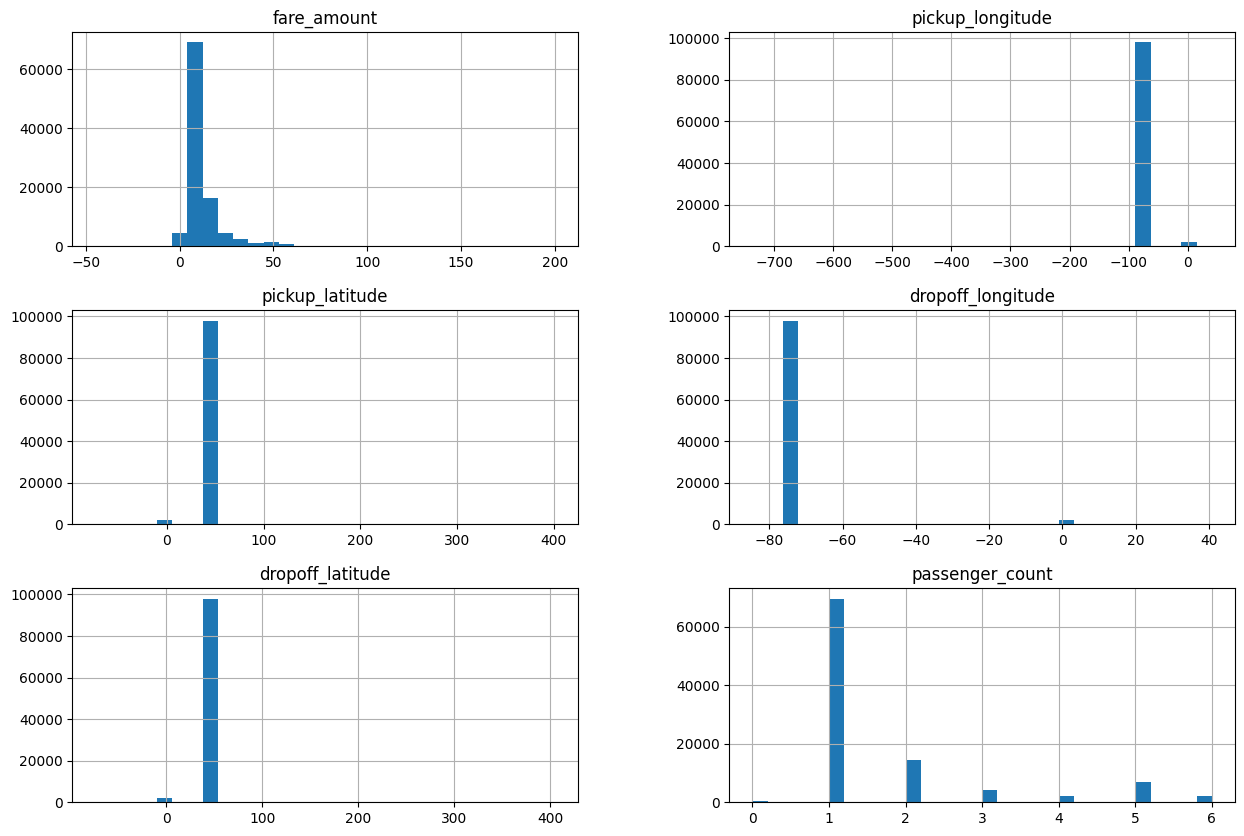

In [ ]:
taxi_fare.hist(bins=30, figsize=(15, 10))
plt.show()

Se puede observar como la longitud y la latitud tanto de recogida de clientes como de descarga de estos, tiene unos valores muy parecidos, esto es debido a que como el dataset solo tiene datos de los taxis de la ciudad de Nueva York, es lógico que estos datos sean o los mismos o que varíen muy poco .

Además, podemos sacar ciertas conclusiones como que la mayoría de las veces viaja un pasajero solo y se realizan viajes cortos de entre 10 y 20 dólares principalmente.

También nos damos cuenta que la columna "fare_amount" tiene valores negativos algo que no puede ser puesto que el taxista no puede pagar al cliente por llevarle y viajes de 0 euros, que tampoco tienen sentido.

Y además en "passenger_count" hay valores que son 0, de nuevo una contradicción que no se puede dejar pasar por alto, puesto que si no hay cliente no puede haber un registro como si se le hubiera recogido en algún sitio, hubiese pagado "x" cantidad de dinero...

Estos datos atípicos se trabajarán en la seccion 4.b de pre-procesamiento.

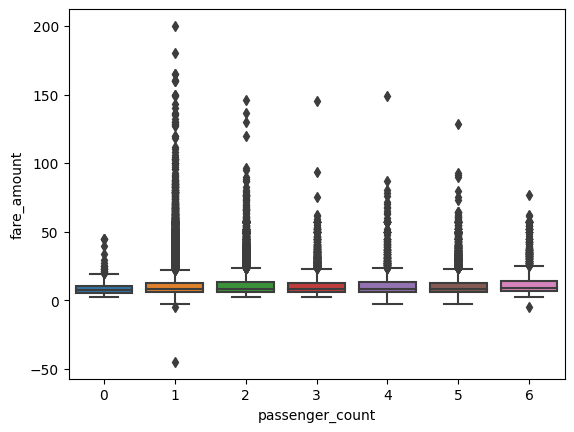

In [ ]:
sns.boxplot(x='passenger_count', y='fare_amount', data=taxi_fare)
plt.show()

Con este gráfico observamos como varía el "fare_amount" respecto al número de pasajeros, y se aprecia que no hay una correlación muy fuerte entre a que a más pasajeros más dinero se gastan en el viaje.

# **4 b.** Realiza las tareas de pre-procesamiento necesarias para poder entrenar algoritmos de clasificación sobre este dataset.

En primer lugar, como hemos dicho antes vamos a tratar con los valores negativos en el precio, algo totalmente atípico

In [ ]:
valores_negativos = taxi_fare['fare_amount'] < 0

# Contar cuántos valores negativos hay
cantidad_valores_negativos = valores_negativos.sum()
cantidad_valores_negativos

9

In [ ]:
filas_con_valores_negativos = taxi_fare[taxi_fare['fare_amount'] < 0]
filas_con_valores_negativos

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,2015-03-09 10:29:46.0000004,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
56748,2015-06-26 01:13:18.0000002,-5.0,2015-06-26 01:13:18 UTC,-73.979797,40.743240,-73.981216,40.737240,6
58937,2010-02-19 23:47:10.0000002,-44.9,2010-02-19 23:47:10 UTC,-73.871120,40.773902,-73.676533,40.786890,1
97838,2015-06-07 02:54:14.0000004,-3.0,2015-06-07 02:54:14 UTC,-73.913246,40.766212,-73.914963,40.764065,5


Como seguramente se trate de un error, podríamos eliminar las filas, pero en este caso vamos a convertir a positivo el "fare_amount" para no perder datos

In [ ]:
taxi_fare['fare_amount'] = taxi_fare['fare_amount'].abs()

valores_negativos_actualizados = taxi_fare['fare_amount'] < 0
cantidad_valores_negativos_actualizados = valores_negativos_actualizados.sum()

print(cantidad_valores_negativos_actualizados)


0


También miramos las filas que "fare_amount" es igual a 0, ya que no tienen tampoco mucho sentido, a menos que se hayan hecho un "simpa". Sin embargo, para nuestra tarea de de predicción no nos es útil, así que las eliminaremos.

In [ ]:
valores_0 = taxi_fare['fare_amount'] == 0
print(valores_0.sum())
taxi_fare[valores_0]

3


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10002,2010-02-15 14:26:01.0000003,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
27891,2015-05-15 21:40:28.00000010,0.0,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
47302,2010-03-18 19:13:39.0000002,0.0,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1


In [ ]:
taxi_fare = taxi_fare[~valores_0]

In [ ]:
valores_0_nuevo = taxi_fare['fare_amount'] == 0
valores_0_nuevo.sum()

0

Ahora vamos a ver cuantas filas tienen 0 pasajeros, una situación que hemos visto que ocurre en las gráficas y que también es inverosímil

In [ ]:
filas_con_pasajeros_cero = taxi_fare[taxi_fare['passenger_count'] == 0]

cantidad_filas_pasajeros_cero = len(filas_con_pasajeros_cero)

print(f"Hay {cantidad_filas_pasajeros_cero} filas donde passenger_count es igual a 0.")
print(filas_con_pasajeros_cero)

Hay 366 filas donde passenger_count es igual a 0.
                                key  fare_amount          pickup_datetime  \
314    2015-06-02 23:16:15.00000012         34.0  2015-06-02 23:16:15 UTC   
566     2012-01-28 21:33:18.0000002          4.9  2012-01-28 21:33:18 UTC   
678     2012-02-27 07:24:20.0000003          6.5  2012-02-27 07:24:20 UTC   
1160    2011-05-25 23:58:48.0000001         13.3  2011-05-25 23:58:48 UTC   
1935    2011-10-23 11:09:28.0000001         10.1  2011-10-23 11:09:28 UTC   
...                             ...          ...                      ...   
98235   2012-02-24 18:45:44.0000006          4.9  2012-02-24 18:45:44 UTC   
98464   2011-05-11 14:41:49.0000004          5.7  2011-05-11 14:41:49 UTC   
98645   2012-02-06 12:09:56.0000005         12.9  2012-02-06 12:09:56 UTC   
98862   2011-04-01 12:32:29.0000005          7.7  2011-04-01 12:32:29 UTC   
98867   2012-04-07 23:15:13.0000002          9.3  2012-04-07 23:15:13 UTC   

       pickup_longitude  

En este caso no se puede asignar un número de sustitución a "passenger_count" como la media de la columna ya que son muchas filas y esto alteraría la solución, así que procederemos a eliminarlas.

In [ ]:
taxi_fare = taxi_fare[taxi_fare['passenger_count'] != 0]

In [ ]:
filas_con_pasajeros_cero_de_nuevo = taxi_fare[taxi_fare['passenger_count'] == 0]

In [ ]:
filas_con_pasajeros_cero_de_nuevo

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Como también observamos en las gráficas anteriores hay filas en las que la longitud y latitud tanto de recogida como de dejar clientes es 0, algo que tampoco puede ser porque por la ciudad de Nueva York no pasa ni el meridiano de Greenwich ni el ecuador.

Esas filas las podremos eliminar, o en el caso de que sean muchas para no perder mucha información del dataset, podemos poner asignar a las que tengan un valor 0 la coordenada que más se repita o quizás la media.

In [ ]:
cantidad_pickup_longitude_cero = (taxi_fare['pickup_longitude'] == 0).sum()
cantidad_pickup_latitude_cero = (taxi_fare['pickup_latitude'] == 0).sum()
cantidad_dropoff_longitude_cero = (taxi_fare['dropoff_longitude'] == 0).sum()
cantidad_dropoff_latitude_cero = (taxi_fare['dropoff_latitude'] == 0).sum()

print(f"pickup_longitude tiene {cantidad_pickup_longitude_cero} filas con valor 0.")
print(f"pickup_latitude tiene {cantidad_pickup_latitude_cero} filas con valor 0.")
print(f"dropoff_longitude tiene {cantidad_dropoff_longitude_cero} filas con valor 0.")
print(f"dropoff_latitude tiene {cantidad_dropoff_latitude_cero} filas con valor 0.")


pickup_longitude tiene 1916 filas con valor 0.
pickup_latitude tiene 1913 filas con valor 0.
dropoff_longitude tiene 1910 filas con valor 0.
dropoff_latitude tiene 1903 filas con valor 0.


In [ ]:
filas_con_valor_cero = taxi_fare[(taxi_fare['pickup_longitude'] == 0) |
                                 (taxi_fare['pickup_latitude'] == 0) |
                                 (taxi_fare['dropoff_longitude'] == 0) |
                                 (taxi_fare['dropoff_latitude'] == 0)]


print(f"Hay {len(filas_con_valor_cero)} filas donde al menos una de las columnas tiene valor 0.")

Hay 1998 filas donde al menos una de las columnas tiene valor 0.


In [ ]:
filas_con_todos_ceros = taxi_fare[(taxi_fare['pickup_longitude'] == 0) &
                                  (taxi_fare['pickup_latitude'] == 0) &
                                  (taxi_fare['dropoff_longitude'] == 0) &
                                  (taxi_fare['dropoff_latitude'] == 0)]

print(f"Hay {len(filas_con_todos_ceros)} filas donde todas las columnas mencionadas tienen valor 0.")
print("Filas con todos 0 en las columnas mencionadas:")
print(filas_con_todos_ceros)

Hay 1829 filas donde todas las columnas mencionadas tienen valor 0.
Filas con todos 0 en las columnas mencionadas:
                                 key  fare_amount          pickup_datetime  \
11      2012-12-24 11:24:00.00000098          5.5  2012-12-24 11:24:00 UTC   
15     2013-11-23 12:57:00.000000190          5.0  2013-11-23 12:57:00 UTC   
26     2011-02-07 20:01:00.000000114          6.5  2011-02-07 20:01:00 UTC   
124     2013-01-17 17:22:00.00000043          8.0  2013-01-17 17:22:00 UTC   
192     2010-09-05 17:08:00.00000092          3.7  2010-09-05 17:08:00 UTC   
...                              ...          ...                      ...   
99619    2009-02-08 01:27:22.0000001         10.6  2009-02-08 01:27:22 UTC   
99768    2015-06-15 03:49:16.0000001          6.0  2015-06-15 03:49:16 UTC   
99829    2012-04-01 17:02:00.0000005         24.9  2012-04-01 17:02:00 UTC   
99904    2010-08-14 17:56:04.0000002          6.9  2010-08-14 17:56:04 UTC   
99971  2011-01-28 21:12:00.

Como son muchas columnas las cuales tienen todas los valores 0, esas columnas las eliminaremos, ya que contienen valores atípicos que estropean nuestro análisis.

**nota**

**Hemos eliminado finalmente todas las filas que contenían al menos un 0, porque al principio habíamos quitado las que contenían todo ceros, luego las que tenían 3 ceros, luego dos, y las que solo había uno eran muy pocas, así que mejor nos cargamos todas**

In [ ]:
len(taxi_fare)

99631

In [ ]:
filas_con_valor_cero = taxi_fare[(taxi_fare[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] == 0).any(axis=1)]


taxi_fare = taxi_fare.drop(filas_con_valor_cero.index)

In [ ]:
len(taxi_fare)

97633

In [ ]:
filas_con_valor_cero_nuevas = taxi_fare[(taxi_fare['pickup_longitude'] == 0) |
                                 (taxi_fare['pickup_latitude'] == 0) |
                                 (taxi_fare['dropoff_longitude'] == 0) |
                                 (taxi_fare['dropoff_latitude'] == 0)]

print(f"Hay {len(filas_con_valor_cero_nuevas)} filas donde al menos una de las columnas tiene valor 0.")

Hay 0 filas donde al menos una de las columnas tiene valor 0.


In [ ]:
filas_con_valor_cero_nuevas

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Una vez que tenemos limpio el dataset de valores atípicos que no deberían estar, nos vamos a centrar en convertir el tipo de datos a lo que sea más sencillo para trabajar para los modelos.

In [ ]:
taxi_fare.select_dtypes('object')

,key,pickup_datetime
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC
...,...,...
99995,2013-09-24 07:39:00.00000071,2013-09-24 07:39:00 UTC
99996,2014-05-15 12:15:45.0000001,2014-05-15 12:15:45 UTC
99997,2015-02-19 17:40:43.0000001,2015-02-19 17:40:43 UTC
99998,2009-10-10 23:35:00.000000165,2009-10-10 23:35:00 UTC


la columna "key" será eliminada porque es como habíamos visto anteriormente, es igual que la columna "pickup_datetime" y no nos proporciona información relevante.

In [ ]:
taxi_fare.drop('key', axis = 1, inplace = True)

In [ ]:
taxi_fare

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
99995,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


In [ ]:
todas_contienen_utc = all(taxi_fare['pickup_datetime'].str.contains('UTC'))
todas_contienen_utc

True

**Nos hemos dado cuenta que UTC no corresponde con el uso horario que hay en Nueva York, es el que tienen los países europeos como Alemania, Inglaterra, es decir, por los que pasa el meridiano de greenwich.**

**La diferencia es de 5 horas y únicamente habría que sumarle 5 horas a todo, pero no lo vemos necesario, ya que los modelos se entrenarían igual, como es proporcional, nada iba a cambiar, únicamente cuando se trata de hacer una predicción ser consciente que es del horario UTC.**

Como todas las filas de la columna "pickup_datetime" contienen las siglas "UTC" pues las eliminaremos para poder trabajar mejor

In [ ]:
taxi_fare['pickup_datetime'] = pd.to_datetime(taxi_fare['pickup_datetime'], utc=True)


In [ ]:
taxi_fare

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
99995,9.0,2013-09-24 07:39:00+00:00,-73.947977,40.784792,-73.964262,40.792347,5
99996,6.0,2014-05-15 12:15:45+00:00,-73.962918,40.799107,-73.974178,40.786487,1
99997,5.0,2015-02-19 17:40:43+00:00,-73.996773,40.723549,-73.991974,40.724724,1
99998,6.9,2009-10-10 23:35:00+00:00,-73.983652,40.756667,-73.982715,40.767067,4


Ahora vamos a separar la fecha en mes-año-dia por un lado y hora por otro, ya que con este creemos que nos ayudará a la hora de evaluar los modelos y encontrar correlaciones

In [ ]:
taxi_fare['pickup_date'] = taxi_fare['pickup_datetime'].dt.date
taxi_fare['pickup_time'] = taxi_fare['pickup_datetime'].dt.time

# Imprimir el DataFrame actualizado
taxi_fare.drop('pickup_datetime', axis = 1, inplace = True)

In [ ]:
taxi_fare

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00
...,...,...,...,...,...,...,...,...
99995,9.0,-73.947977,40.784792,-73.964262,40.792347,5,2013-09-24,07:39:00
99996,6.0,-73.962918,40.799107,-73.974178,40.786487,1,2014-05-15,12:15:45
99997,5.0,-73.996773,40.723549,-73.991974,40.724724,1,2015-02-19,17:40:43
99998,6.9,-73.983652,40.756667,-73.982715,40.767067,4,2009-10-10,23:35:00


In [ ]:
taxi_fare['pickup_date'] = taxi_fare['pickup_date'].astype(str)


In [ ]:
taxi_fare['year'] = taxi_fare['pickup_date'].str[:4].astype(int)
taxi_fare['month'] = taxi_fare['pickup_date'].str[5:7].astype(int)
taxi_fare['day'] = taxi_fare['pickup_date'].str[8:10].astype(int)

In [ ]:
taxi_fare['pickup_time'] = taxi_fare['pickup_time'].astype(str)
taxi_fare['pickup_hour'] = taxi_fare['pickup_time'].str[:2].astype(int)

In [ ]:
taxi_fare

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,year,month,day,pickup_hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21,2009,6,15,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16,2010,1,5,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00,2011,8,18,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42,2012,4,21,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00,2010,3,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,-73.947977,40.784792,-73.964262,40.792347,5,2013-09-24,07:39:00,2013,9,24,7
99996,6.0,-73.962918,40.799107,-73.974178,40.786487,1,2014-05-15,12:15:45,2014,5,15,12
99997,5.0,-73.996773,40.723549,-73.991974,40.724724,1,2015-02-19,17:40:43,2015,2,19,17
99998,6.9,-73.983652,40.756667,-73.982715,40.767067,4,2009-10-10,23:35:00,2009,10,10,23


In [ ]:
taxi_fare.drop(["pickup_time", "pickup_date"], axis = 1, inplace = True)

Hemos separado la fecha como si fueran más características, ya que puede que en determinados días o meses se pague más dinero en el taxi, etc.

Además, nos hemos quedado solo con la hora en la que se recoge a los clientes, porque los minutos y segundos son irrelevantes en cierto modo.

In [ ]:
taxi_fare.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
pickup_hour            int64
dtype: object

Vamos a comprobar que no haya ningún dato que sea nulo en las columnas

In [ ]:
taxi_fare.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
pickup_hour          0
dtype: int64

In [ ]:
all(taxi_fare.isna().sum(axis=1)) == 0

True

Y vamos a estandarizar los datos para poder entrenar bien algunos modelos con ellos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
taxi_fare[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] = scaler.fit_transform(taxi_fare[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])


In [ ]:
taxi_fare

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,pickup_hour
0,4.5,0.022104,0.009241,0.024323,0.005945,1,2009,6,15,17
1,16.9,-0.028833,0.005644,-0.027097,0.030947,1,2010,1,5,16
2,5.7,-0.018953,0.023587,-0.031570,0.019673,2,2011,8,18,0
3,7.7,-0.020256,0.013487,-0.031692,0.022373,1,2012,4,21,4
4,5.3,-0.014610,0.026007,-0.018651,0.031577,1,2010,3,9,7
...,...,...,...,...,...,...,...,...,...,...
99995,9.0,-0.008643,0.032034,-0.021492,0.034655,5,2013,9,24,7
99996,6.0,-0.013075,0.037174,-0.025196,0.032554,1,2014,5,15,12
99997,5.0,-0.023116,0.010042,-0.031844,0.010408,1,2015,2,19,17
99998,6.9,-0.019224,0.021934,-0.028385,0.025591,4,2009,10,10,23


Ahora realizaremos la selección de características

##SELECCIÓN DE CARACTERISTICAS

In [ ]:
X = taxi_fare.drop(['fare_amount'], axis=1)
y = taxi_fare['fare_amount']

In [ ]:
X_array_variance_method = np.array(taxi_fare.drop(['fare_amount'], axis=1))

In [ ]:
X_array_variance_method.shape


(97633, 9)

Metodo de Umbral de la Varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.fit_transform(X_array_variance_method)
X_array_variance_method.shape

(97633, 9)

Método KBests

In [ ]:
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import sklearn.feature_selection

feature_selection.f_regression(X, y)


(array([8.41818177e+00, 5.21694286e+00, 6.77627426e+00, 1.23159970e+00,
        2.21429549e+01, 1.35187005e+03, 5.86111523e+01, 3.40964778e-01,
        3.16301742e+01]),
 array([3.71570077e-003, 2.23699773e-002, 9.23914830e-003, 2.67098894e-001,
        2.53429178e-006, 6.28209635e-294, 1.93878896e-014, 5.59274212e-001,
        1.87017203e-008]))

In [ ]:
X_KBests_methode = taxi_fare.drop('fare_amount', axis = 1)
selector = SelectKBest(f_regression, k=5)
X_KBests = selector.fit_transform(X_KBests_methode, y)
X_KBests.shape[1]


5

In [ ]:
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_KBests_methode.columns[selected_indices]
X_KBests_methode = X_KBests_methode[selected_feature_names]
X_KBests_methode.columns

Index(['pickup_longitude', 'passenger_count', 'year', 'month', 'pickup_hour'], dtype='object')

Ridge

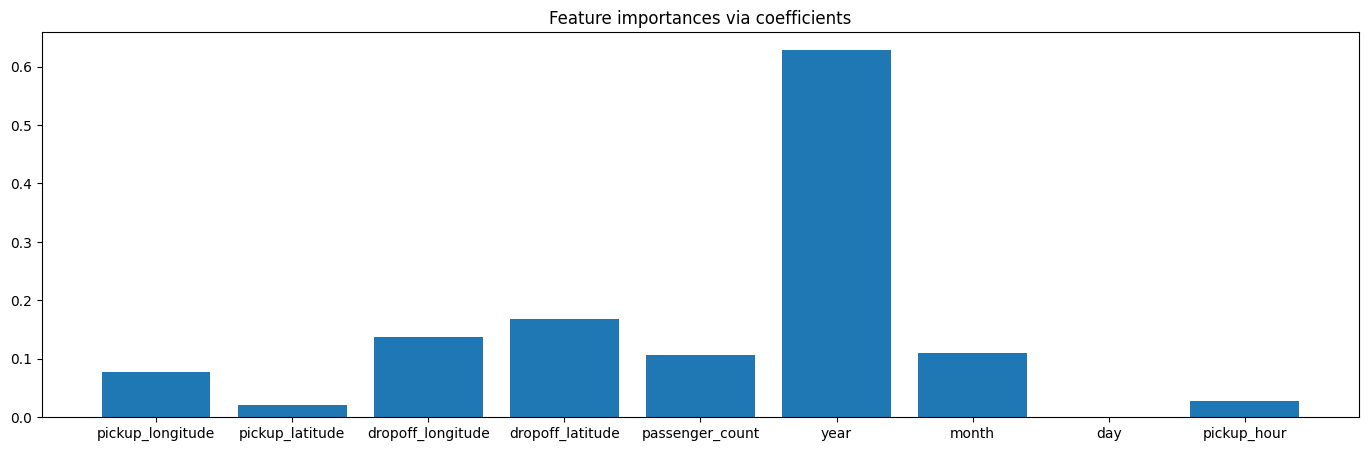

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.figure(figsize=(17,5))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
X_SelectFromModel_ridge = feature_names[sfm.get_support()]
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['dropoff_latitude' 'year']
Done in 0.133s


Selección de características con RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

In [ ]:
nombres_caracteristicas = X.columns
importancias_df = pd.DataFrame({'Característica': nombres_caracteristicas, 'Importancia': feature_importances})

importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)
importancias_df

,Característica,Importancia
2,dropoff_longitude,0.340069
0,pickup_longitude,0.300932
3,dropoff_latitude,0.166885
1,pickup_latitude,0.121516
5,year,0.022619
8,pickup_hour,0.016267
7,day,0.014592
6,month,0.012561
4,passenger_count,0.004560


In [ ]:
X_RandomForest_1 = list(importancias_df['Característica'][:2])
X_RandomForest_2 = list(importancias_df['Característica'][:4])

print(X_RandomForest_1)
print(X_RandomForest_2)

['dropoff_longitude', 'pickup_longitude']
['dropoff_longitude', 'pickup_longitude', 'dropoff_latitude', 'pickup_latitude']


SequentialFeatureSelection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['year' 'month']
Done in 3.145s
Features selected by backward sequential selection: ['year' 'month']
Done in 19.788s


In [ ]:
X_SequentialFeatureSelector = feature_names[sfs_forward.get_support()]
X_SequentialFeatureSelector

array(['year', 'month'], dtype=object)

Selección de características con LinearRegression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = LinearRegression()

rfe = RFE(model, n_features_to_select=4)

rfe.fit(X_train, y_train)

selected_features_LR = X.columns[rfe.support_]


In [ ]:
selected_features_LR

Index(['dropoff_longitude', 'dropoff_latitude', 'year', 'month'], dtype='object')

Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

selected_features_Lasso = X.columns[lasso_model.coef_ != 0]


In [ ]:
selected_features_Lasso
coefficients = lasso_model.coef_


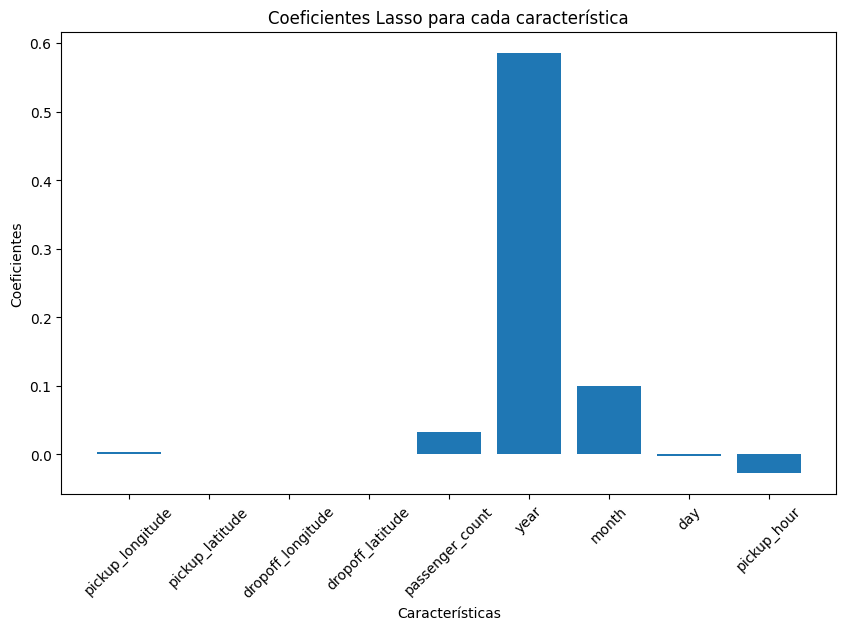

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), labels=X.columns, rotation=45)
plt.xlabel('Características')
plt.ylabel('Coeficientes')
plt.title('Coeficientes Lasso para cada característica')
plt.show()

Matriz de correlación:
                    fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.009285        -0.007310   
pickup_longitude      0.009285          1.000000        -0.696279   
pickup_latitude      -0.007310         -0.696279         1.000000   
dropoff_longitude     0.008331          0.755047        -0.876844   
dropoff_latitude     -0.003552         -0.695269         0.822213   
passenger_count       0.015058          0.011881        -0.013050   
year                  0.116866          0.008297        -0.012160   
month                 0.024494         -0.000719         0.005846   
day                  -0.001869          0.014009        -0.013916   
pickup_hour          -0.017996         -0.002743         0.003561   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.008331         -0.003552         0.015058   
pickup_longitude            0.755047         -0.695269         0.0

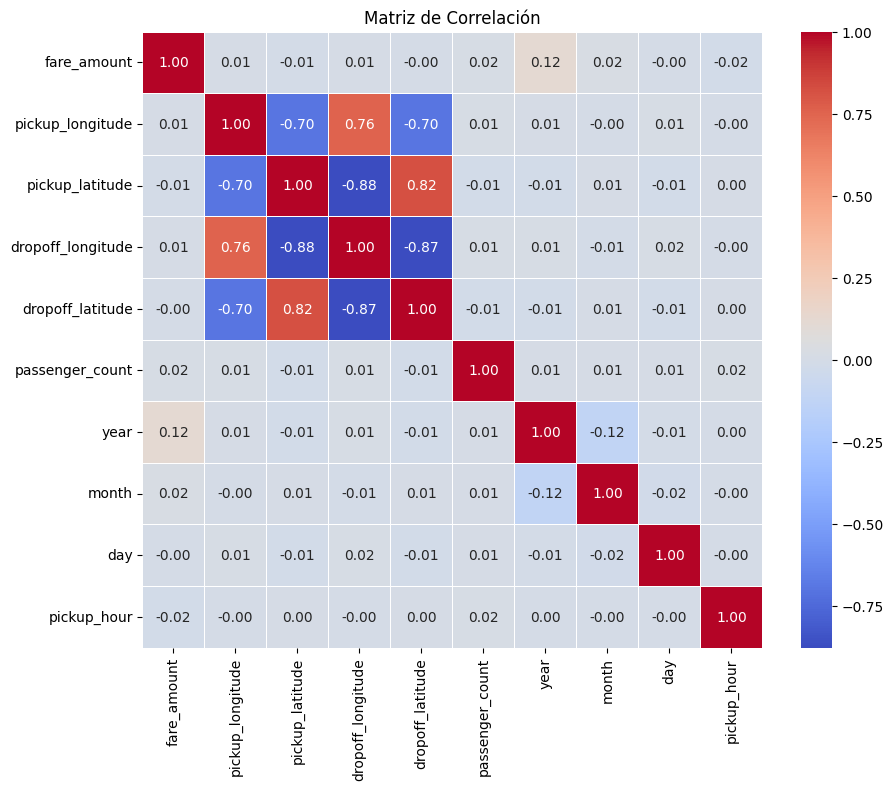

In [ ]:
correlation_matrix = taxi_fare.corr()

print("Matriz de correlación:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.savefig('grafica_corr.png')
plt.show()

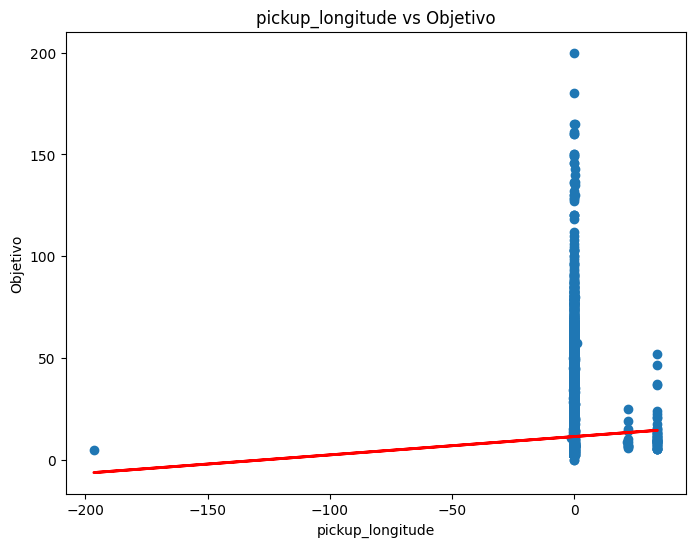

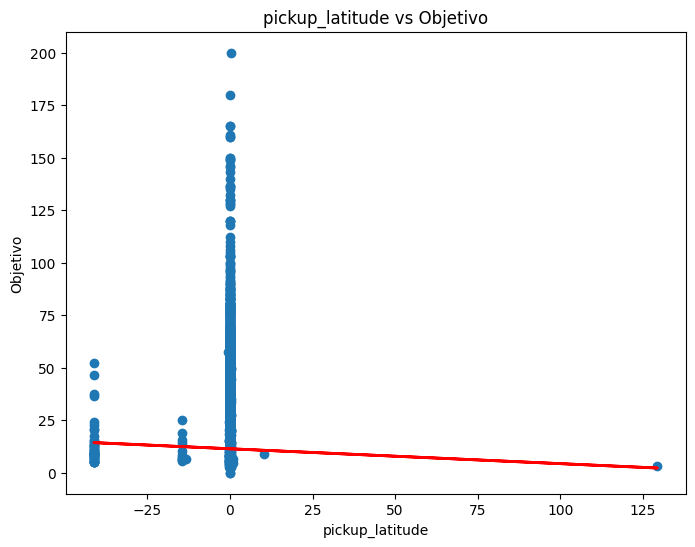

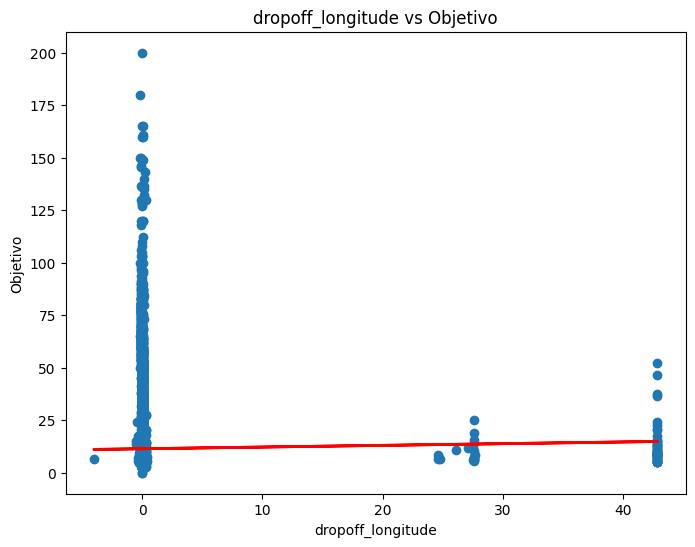

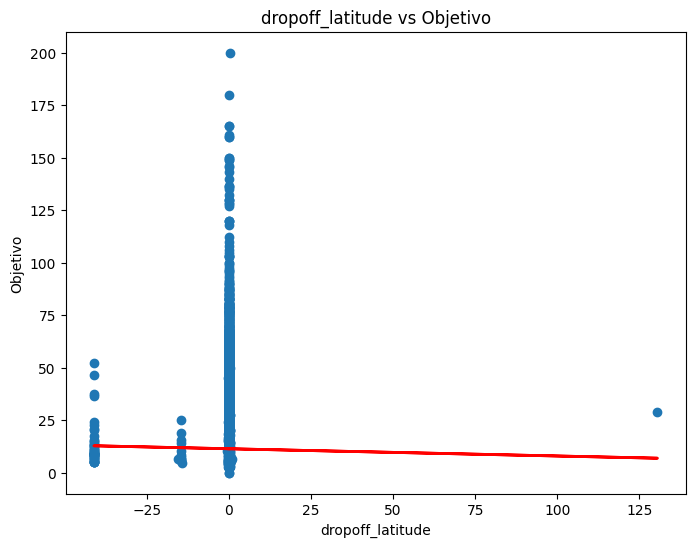

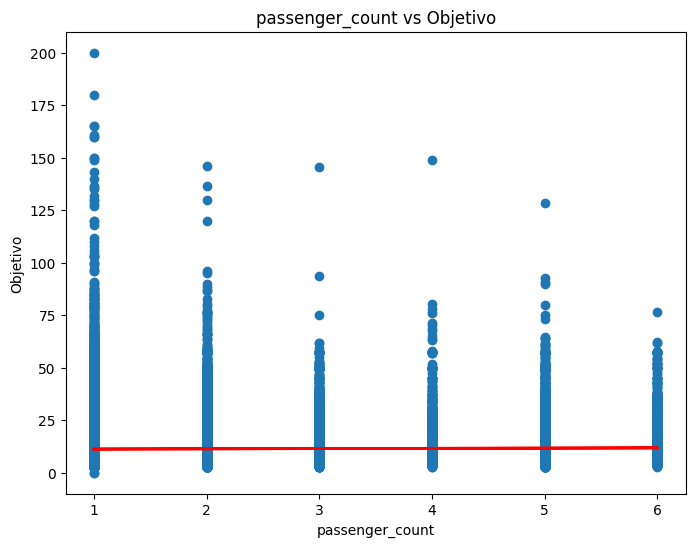

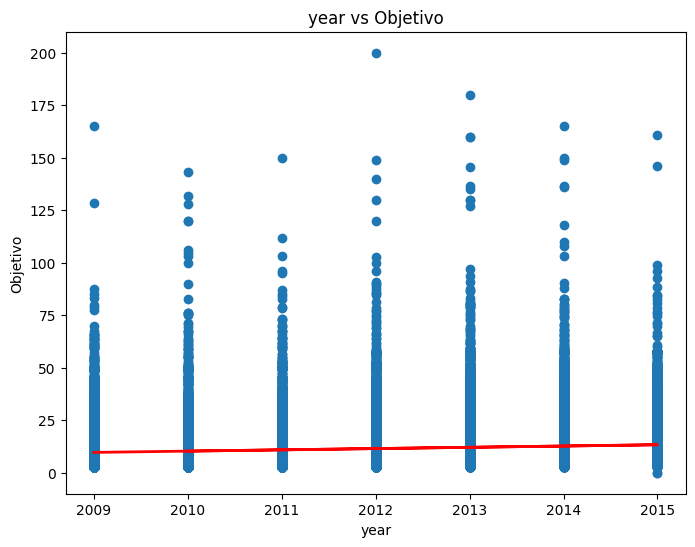

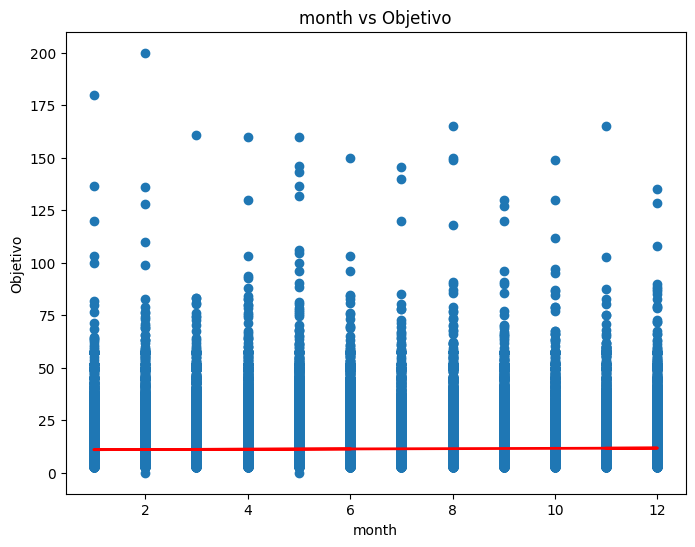

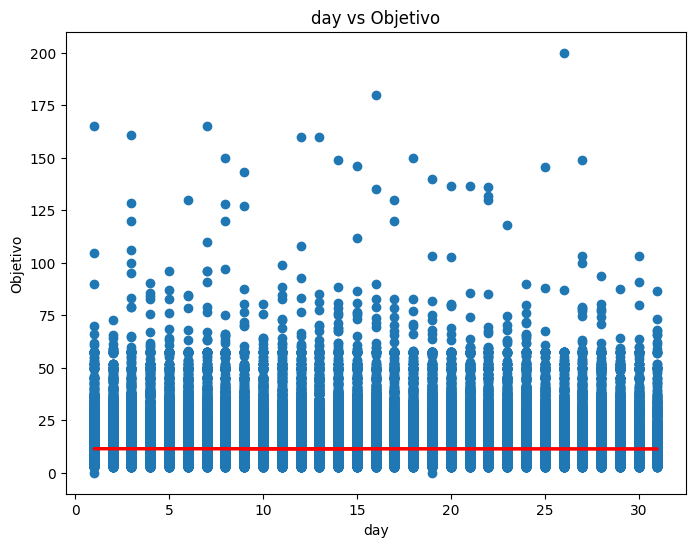

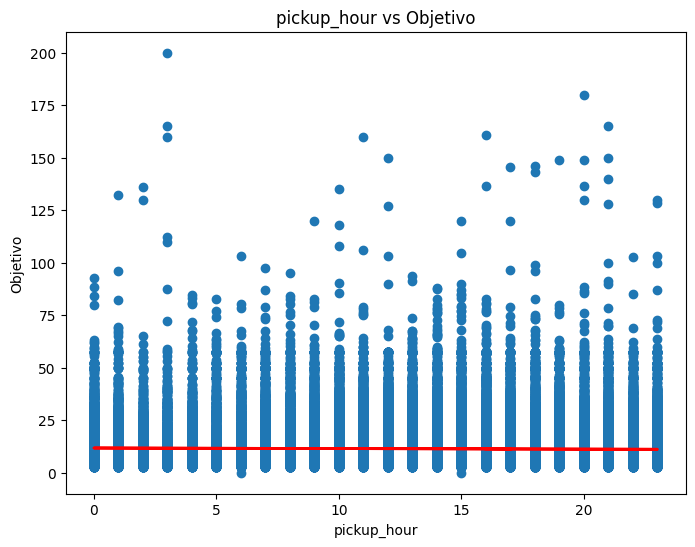

In [ ]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(taxi_fare[column], taxi_fare['fare_amount'])
    coefficients = np.polyfit(taxi_fare[column], taxi_fare['fare_amount'], 1)
    line = np.polyval(coefficients, taxi_fare[column])


    plt.plot(taxi_fare[column], line, color='red', linewidth=2)
    plt.title(f'{column} vs Objetivo')
    plt.xlabel(column)
    plt.ylabel('Objetivo')
    plt.show()

Como se puede observar, muy lineal no parece que sea, igualmente lo probaremos, pero es muy posible que una regresión lineal como modelo no arroje los mejores resultados.

# **4 c.** Entrega y evalúa al menos 3 algoritmos para predicción de los vistos en clase. Utiliza las métricas adecuadas para evaluar estos algoritmos.

###1. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

Método del Umbral de Varianza

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_array_variance_method, y, test_size = 0.33, random_state = 42)

rfr = RandomForestRegressor(n_estimators=30, random_state = 0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

RF_r2_score__var= r2_score(y_test, y_pred)
RF_mean_absolute_error_var = mean_absolute_error(y_test, y_pred)

In [ ]:
print('r2_score con 30 árboles : {0:0.4f}'. format(r2_score(y_test, y_pred)))
print('mean_squared_error con 30 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 30 árboles : {0:0.4f}'. format(mean_absolute_error(y_test, y_pred)))

r2_score con 30 árboles : 0.8036
mean_squared_error con 30 árboles : 18.3935
mean_absolute_error con 30 árboles : 2.0177


In [ ]:
primer_arbol = rfr.estimators_[0]
profundidad_arbol = primer_arbol.get_depth()

print("Profundidad del primer árbol:", profundidad_arbol)

Profundidad del primer árbol: 55


Método KBests

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_KBests_methode, y, test_size = 0.33, random_state = 42)

rfr = RandomForestRegressor(n_estimators=40, random_state = 0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print('r2_score con 40 árboles : {0:0.4f}'. format(r2_score(y_test, y_pred)))
print('mean_squared_error con 40 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 40 árboles : {0:0.4f}'. format(mean_absolute_error(y_test, y_pred)))

r2_score con 40 árboles : 0.1975
mean_squared_error con 40 árboles : 75.1734
mean_absolute_error con 40 árboles : 5.4675


Método Ridge

In [ ]:
X_ridge = X[X_SelectFromModel_ridge]
X_train, X_test, y_train, y_test = train_test_split(X_ridge, y, test_size = 0.33, random_state = 42)

rfr = RandomForestRegressor(n_estimators=30, random_state = 0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print('r2_score con 30 árboles : {0:0.4f}'. format(r2_score(y_test, y_pred)))
print('mean_squared_error con 30 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 30 árboles : {0:0.4f}'. format(mean_absolute_error(y_test, y_pred)))

r2_score con 30 árboles : -0.0377
mean_squared_error con 30 árboles : 97.2053
mean_absolute_error con 30 árboles : 6.0730


Método RandomForestRegressor

In [ ]:
X_random_forest_regressor_1 = X[X_RandomForest_1]
X_random_forest_regressor_2 = X[X_RandomForest_2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_random_forest_regressor_1, y, test_size = 0.33, random_state = 42)

rfr = RandomForestRegressor(n_estimators=30, random_state = 0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print('r2_score con 30 árboles : {0:0.4f}'. format(r2_score(y_test, y_pred)))
print('mean_squared_error con 30 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 30 árboles : {0:0.4f}'. format(mean_absolute_error(y_test, y_pred)))

r2_score con 30 árboles : 0.6360
mean_squared_error con 30 árboles : 34.0953
mean_absolute_error con 30 árboles : 3.4968


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_random_forest_regressor_2, y, test_size = 0.33, random_state = 42)

rfr = RandomForestRegressor(n_estimators=30, random_state = 0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

RF_r2_score_rf= r2_score(y_test, y_pred)
RF_mean_absolute_error_rf = mean_absolute_error(y_test, y_pred)

print('r2_score con 30 árboles : {0:0.4f}'. format(r2_score(y_test, y_pred)))
print('mean_squared_error con 30 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 30 árboles : {0:0.4f}'. format(mean_absolute_error(y_test, y_pred)))

r2_score con 30 árboles : 0.7746
mean_squared_error con 30 árboles : 21.1136
mean_absolute_error con 30 árboles : 2.2366


SequentialFeatureSelection

In [ ]:
X_SequentialFeatureSelector_features = taxi_fare[X_SequentialFeatureSelector]

X_train, X_test, y_train, y_test = train_test_split(X_SequentialFeatureSelector_features, y, test_size = 0.33, random_state = 42)

rfr = RandomForestRegressor(n_estimators=30, random_state = 0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print('r2_score con 30 árboles : {0:0.4f}'. format(r2_score(y_test, y_pred)))
print('mean_squared_error con 30 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 30 árboles : {0:0.4f}'. format(mean_absolute_error(y_test, y_pred)))

r2_score con 30 árboles : 0.0171
mean_squared_error con 30 árboles : 92.0688
mean_absolute_error con 30 árboles : 5.9463


Lasso

In [ ]:
X_Lasso = taxi_fare[selected_features_Lasso]
rfr = RandomForestRegressor(n_estimators=30, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_Lasso, y, test_size = 0.33, random_state = 42)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

RF_r2_score_lasso= r2_score(y_test, y_pred)
RF_mean_absolute_error_lasso = mean_absolute_error(y_test, y_pred)

print('r2_score con 30 árboles : {0:0.4f}'. format(RF_r2_score_lasso))
print('mean_squared_error con 30 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 30 árboles : {0:0.4f}'. format(RF_r2_score_lasso))

r2_score con 30 árboles : 0.2144
mean_squared_error con 30 árboles : 73.5892
mean_absolute_error con 30 árboles : 0.2144


In [ ]:
X_LR = taxi_fare[selected_features_LR]
X_train, X_test, y_train, y_test = train_test_split(X_LR, y, test_size = 0.33, random_state = 42)

rfr = RandomForestRegressor(n_estimators=10, random_state = 0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print('r2_score con 30 árboles : {0:0.4f}'. format(r2_score(y_test, y_pred)))
print('mean_squared_error con 30 árboles : {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error con 30 árboles : {0:0.4f}'. format(mean_absolute_error(y_test, y_pred)))

r2_score con 30 árboles : 0.2820
mean_squared_error con 30 árboles : 67.2572
mean_absolute_error con 30 árboles : 5.0924


Como se puede observar, los métodos de selección de carcaterísticas que mejores resultados han obtenido con el algoritmo RandomForestRegressor han sido el método del Umbral de Varianza y la selección de características con un RandomForestRegressor.

Cuyas características eran todas las columnas y ['dropoff_longitude', 'pickup_longitude', 'dropoff_latitude', 'pickup_latitude'], respectivamente.

Esto significa que el resto de métodos, como han dado resultados tan pobres que algunos ni pasan de 0.1 en r2_score o tienen un error absoluto muy grande, estos no serán usados en los siguientes algoritmos, ya que no mejorarán significativamente su resultado.

### 2. SVR


In [ ]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X_array_variance_method, y, test_size = 0.33, random_state = 42)

model = svm.SVR(kernel="linear")
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"El error absoluto medio del modelo es {mae:.2f}")
print(f"El r2_score del modelo es {r2:.2f}")

El error absoluto medio del modelo es 11.30
El r2_score del modelo es -75.74


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Lasso, y, test_size = 0.33, random_state = 42)
model = svm.SVR(kernel="linear")
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"El error absoluto medio del modelo es {mae:.2f}")
print(f"El r2_score del modelo es {r2:.2f}")

El error absoluto medio del modelo es 7.16
El r2_score del modelo es -9.76


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_random_forest_regressor_2, y, test_size = 0.33, random_state = 42)
model = svm.SVR(kernel="linear")
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"El error absoluto medio del modelo es {mae:.2f}")
print(f"El r2_score del modelo es {r2:.2f}")

El error absoluto medio del modelo es 5.38
El r2_score del modelo es -0.09


Se puede observar como con SVR la predicción es mucho peor. El error absoluto medio que teníamos con RandomForestRegressor en aquellos que arrojaban buenos resultados era de aproximadamente 2, sin embargo, con este modelo ninguna selección de características arrojan buenos resultados, puesto que el error absoluto medio no baja en ningún caso de 5

### 3. Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X_array_variance_method, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(criterion = 'absolute_error', random_state=42)

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
DTR_abs_e_var = mean_absolute_error(y_test, y_pred)
DTR_r2_var = r2_score(y_test, y_pred)

print(f"Error absoluto medio: {DTR_abs_e_var}")
print(f"r2_score: {DTR_r2_var}")

Error absoluto medio: 2.937274030829108
r2_score: 0.5867725896042361


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Lasso, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(criterion = 'absolute_error', random_state=42)

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

DTR_abs_e_lasso = mean_absolute_error(y_test, y_pred)
DTR_r2_lasso = r2_score(y_test, y_pred)

print(f"Error absoluto medio: {DTR_abs_e_lasso}")
print(f"r2_score: {DTR_r2_lasso}")

Error absoluto medio: 7.352257899318892
r2_score: -0.5554793425657587


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_random_forest_regressor_2, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(criterion = 'absolute_error', random_state=42)

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

DTR_abs_e_rf = mean_absolute_error(y_test, y_pred)
DTR_r2_rf = r2_score(y_test, y_pred)

print(f"Error absoluto medio: {DTR_abs_e_rf}")
print(f"r2_score: {DTR_r2_rf}")

Error absoluto medio: 3.0532513955036613
r2_score: 0.577740127776437


En este caso, los resultados del Decision Tree Regresion mejorarn los de del SVR, además se puede observar como no se consigue un r2_score muy alto, se podría llegar a decir que es hasta un poco malo porque solo es ligeramente superior a 0.5.

Sin embargo, el error absoluto medio que se comete es bastante bajo, de 2 o 3 euros, por lo que no está nada mal en el contexto en el que estamos.

### 4. Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_array_variance_method, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")


Error absoluto medio: 5.977501429912867
Coeficiente de determinación (R²): 0.017640265761703522


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Lasso, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

Error absoluto medio: 5.9766221182336485
Coeficiente de determinación (R²): 0.01791248616628538


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_random_forest_regressor_2, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

Error absoluto medio: 6.063277111177699
Coeficiente de determinación (R²): -9.491560299257351e-05


En este caso, ya sabíamos que los resultados con este algoritmo no iban a ser buenos, puesto que como se ha visto anteriormente en una gráfica, los datos carecen de relación lineal entre ellos, aún así quisimos añadir este algoritmo puesto que es uno de los básicos cuando de hacer predicciones se trata.

### 5. Perceptrón

In [ ]:
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(X_array_variance_method, y, test_size=0.2, random_state=42)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=500, random_state=42)
mlp_regressor.fit(X_train, y_train)
y_pred = mlp_regressor.predict(X_test)

score = mlp_regressor.score(X_test, y_test)
MLP_mae_var = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto Medio: {MLP_mae_var}")

MLP_r2_var = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {MLP_r2_var}")


Error absoluto Medio: 5.4647601753277755
Coeficiente de determinación (R²): -0.048814586516835456


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Lasso, y, test_size=0.2, random_state=42)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=500, random_state=42)
mlp_regressor.fit(X_train, y_train)
y_pred = mlp_regressor.predict(X_test)

score = mlp_regressor.score(X_test, y_test)
MLP_mae_lasso = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto Medio: {MLP_mae_lasso}")

MLP_r2_lasso = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {MLP_r2_lasso}")

Error absoluto Medio: 5.907965098499458
Coeficiente de determinación (R²): 0.00045751387350045913


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_random_forest_regressor_2, y, test_size=0.2, random_state=42)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=500, random_state=42)
mlp_regressor.fit(X_train, y_train)
y_pred = mlp_regressor.predict(X_test)

score = mlp_regressor.score(X_test, y_test)
MLP_mae_RF = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto Medio: {MLP_mae_RF}")

MLP_r2_RF = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {MLP_r2_RF}")

Error absoluto Medio: 2.2972952863684295
Coeficiente de determinación (R²): 0.7644506004899173


### Conclusiones y gráficas

Tras usar el Perceptrón como último algoritmo, seguimos observando como para cierto grupo de características sacadas con (umbral de varianza y lasso) no aprende bien y no saca buenos resultados sin embargo, aquellas sacadas por el RandomForestRegressor obtiene buenos resultados, con un error muy bajito y un coeficiente de determinación bastante decente

Como conclusión se puede hacer especial mención a la selección de características usando un modelo como el RandomForestRegressor ya que es el que mejor resultados ha arrojado de media en todos los algoritmos.

De todos ellos, el que mejor predicción ha hecho ha sido el RandomForestRegressor, seguido muy de cerca por el Decision Tree.

Aun así, aunque los coeficientes de determinación no hayan sido del todo altos, observando los errores absolutos medios, podemos concluir que hay una buena aproximación puesto que en viajes de taxi donde el precio a veces ronda los 50 dólares, el hecho de predecir con un margen de error de entre 2 y 5 dólares es bastante bueno.

Además, sobre estos resultados se puede decir que la elección de características no ha sido tan determinante como se esperaba, es decir, pensábamos que características como la hora en la que se sube alguien al taxi, así como el número de pasajeros sería determinante, sin embargo, no ha sido así, en el sentido que los mejores resultados se han obtenido ccuando se han tenido en cuenta todas las características, quizás hay alguna que tenga más importancia que otra, pero casi todas aportan información relevante a la hora de hacer la predicción.

Aunque la segunda mejor elección de características ha sido **['dropoff_longitude', 'pickup_longitude', 'dropoff_latitude', 'pickup_latitude']**, algo que tiene bastante sentido puesto que sabiendo la ubicación desde donde se recoje a algún cliente y donde se le deja, se puede predecir con cierta facilidad cuanto dinero vale ese viaje.

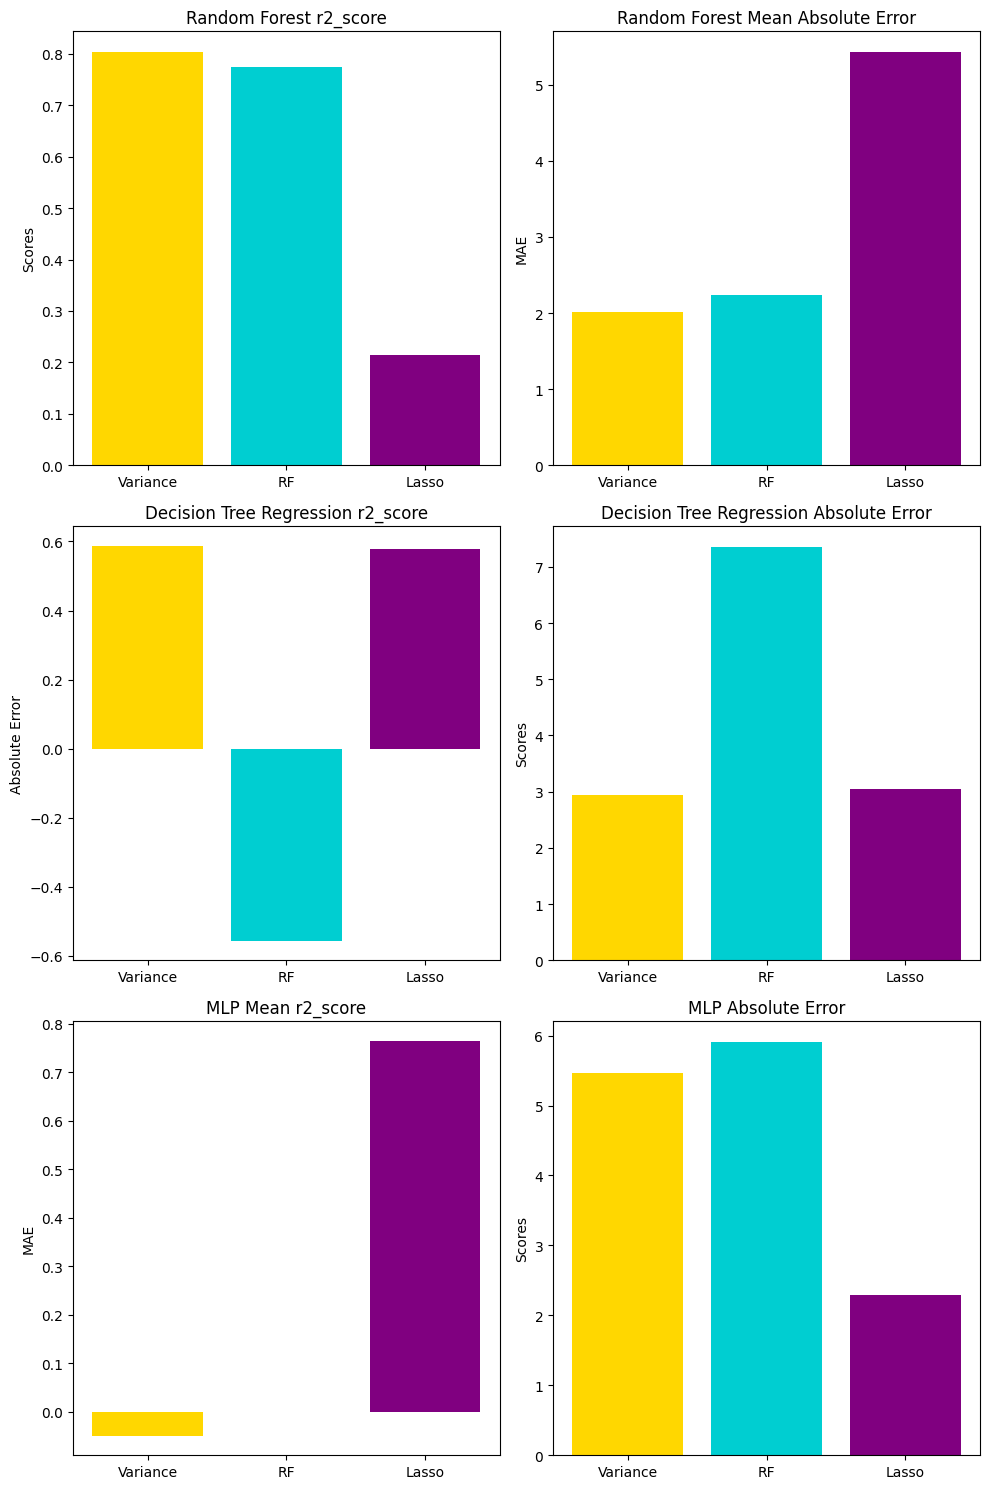

In [ ]:
models = ['Variance', 'RF', 'Lasso']

data1 = [RF_r2_score__var, RF_r2_score_rf, RF_r2_score_lasso]
data2 = [RF_mean_absolute_error_var, RF_mean_absolute_error_rf, RF_mean_absolute_error_lasso]

data3 = [DTR_r2_var, DTR_r2_lasso, DTR_r2_rf]
data4 = [DTR_abs_e_var, DTR_abs_e_lasso, DTR_abs_e_rf]

data5 = [MLP_r2_var, MLP_r2_lasso, MLP_r2_RF]
data6 = [MLP_mae_var, MLP_mae_lasso, MLP_mse_RF]

colors = ['#FFD700', '#00CED1', '#800080']


fig, axs = plt.subplots(3, 2, figsize=(10, 15))

axs[0, 0].bar(models, data1, color=colors)
axs[0, 0].set_title('Random Forest r2_score')
axs[0, 0].set_ylabel('Scores')

axs[0, 1].bar(models, data2, color=colors)
axs[0, 1].set_title('Random Forest Mean Absolute Error')
axs[0, 1].set_ylabel('MAE')

axs[1, 0].bar(models, data3, color=colors)
axs[1, 0].set_title('Decision Tree Regression r2_score')
axs[1, 0].set_ylabel('Absolute Error')

axs[1, 1].bar(models, data4, color=colors)
axs[1, 1].set_title('Decision Tree Regression Absolute Error')
axs[1, 1].set_ylabel('Scores')

axs[2, 0].bar(models, data5, color=colors)
axs[2, 0].set_title('MLP Mean r2_score')
axs[2, 0].set_ylabel('MAE')

axs[2, 1].bar(models, data6, color=colors)
axs[2, 1].set_title('MLP Absolute Error')
axs[2, 1].set_ylabel('Scores')

plt.tight_layout()
plt.show()

